# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\rubix\Downloads\Machine Learning 1\02 Data' 

### Weather Data

In [3]:
df_original = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
df_scaled = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_scaled.csv'), index_col = False)

### Pleasant Predictor Data

In [5]:
df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [6]:
df_original

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [7]:
df_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [8]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Check

#### Define Quick Check

In [9]:
import pandas as pd

# Define what a quick check does

def quick_data_check(df, n_top_values=5):
    print("=== Shape ===")
    print(df.shape)
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    print("\n=== First 5 Rows ===")
    print(df.head())
    
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    print("\n=== Basic Stats (Numeric Columns) ===")
    print(df.describe())
    
    print("\n=== Extended Numeric Summary ===")
    print(df.select_dtypes(include='number').agg(['mean', 'median', 'min', 'max']))
    
    print("\n=== Constant Columns ===")
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    print(constant_cols if constant_cols else "None")
    
    print("\n=== Mixed Data Types Check ===")
    for column in df.columns:
        inferred_type = pd.api.types.infer_dtype(df[column])
        print(f"Column '{column}': {inferred_type}")
        if inferred_type in ['mixed', 'mixed-integer']:
            print(f"  --> Column '{column}' has mixed data types.")  # Fixed indentation here
    
    print("\n=== Duplicate Row Counts ===")
    print(df.duplicated().value_counts())
    
    print("\n=== Top Values for Categorical Columns ===")
    for col in df.select_dtypes(include='object'):
        print(f"\nColumn: {col}")
        print(df[col].value_counts(dropna=False).head(n_top_values))
    
    print("\n=== Correlation Matrix (Numeric Only) ===")
    print(df.corr(numeric_only=True))

# Use quick_data_check(df) to call data

In [10]:
quick_data_check(df_scaled)

=== Shape ===
(22950, 170)

=== Data Types ===
DATE                     int64
MONTH                    int64
BASEL_cloud_cover      float64
BASEL_wind_speed       float64
BASEL_humidity         float64
                        ...   
VALENTIA_snow_depth    float64
VALENTIA_sunshine      float64
VALENTIA_temp_mean     float64
VALENTIA_temp_min      float64
VALENTIA_temp_max      float64
Length: 170, dtype: object

=== First 5 Rows ===
       DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066     

### How many pleasant days per city?

In [11]:
df_pleasant.sum()

DATE                           456930730597
BASEL_pleasant_weather                 5664
BELGRADE_pleasant_weather              7992
BUDAPEST_pleasant_weather              7431
DEBILT_pleasant_weather                4459
DUSSELDORF_pleasant_weather            4934
HEATHROW_pleasant_weather              4959
KASSEL_pleasant_weather                3774
LJUBLJANA_pleasant_weather             6376
MAASTRICHT_pleasant_weather            4766
MADRID_pleasant_weather               10247
MUNCHENB_pleasant_weather              4767
OSLO_pleasant_weather                  3579
SONNBLICK_pleasant_weather                0
STOCKHOLM_pleasant_weather             3894
VALENTIA_pleasant_weather              1174
dtype: int64

### Notes

Well, SONNBLICK may have some issues in their data recording or it's an unpleasant place!

GDANSK, ROMA, TOURS are not included in the pleasant days data and will need to be dropped from the original and scaled data in order for the pleasant day data to be combined.

## Filtering

### df_original

In [12]:
# A list of all the strings you want to search for
search_terms = ['GDANSK', 'ROMA', 'TOURS']

# Join the list of terms into a single string for the regex pattern
pattern = '|'.join(search_terms)

# Drop all columns containing any of the terms
df_filtered = df_original.drop(df_original.filter(regex=pattern).columns, axis=1)

In [13]:
quick_data_check(df_filtered)

=== Shape ===
(22950, 149)

=== Data Types ===
DATE                     int64
MONTH                    int64
BASEL_cloud_cover        int64
BASEL_wind_speed       float64
BASEL_humidity         float64
                        ...   
VALENTIA_snow_depth      int64
VALENTIA_sunshine      float64
VALENTIA_temp_mean     float64
VALENTIA_temp_min      float64
VALENTIA_temp_max      float64
Length: 149, dtype: object

=== First 5 Rows ===
       DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32     

### df_scaled

In [14]:
# TO BE CLEAR, I had some AI help putting this together. I was already familiar with regex filters, but had never used them in Python.
# Turns out, it's not too bad to implement.

# A list of all the strings you want to search for
search_terms = ['GDANSK', 'ROMA', 'TOURS']

# Join the list of terms into a single string for the regex pattern
pattern = '|'.join(search_terms)

# Drop all columns containing any of the terms
df_filtered2 = df_scaled.drop(df_scaled.filter(regex=pattern).columns, axis=1)

In [15]:
quick_data_check(df_filtered2)

=== Shape ===
(22950, 149)

=== Data Types ===
DATE                     int64
MONTH                    int64
BASEL_cloud_cover      float64
BASEL_wind_speed       float64
BASEL_humidity         float64
                        ...   
VALENTIA_snow_depth    float64
VALENTIA_sunshine      float64
VALENTIA_temp_mean     float64
VALENTIA_temp_min      float64
VALENTIA_temp_max      float64
Length: 149, dtype: object

=== First 5 Rows ===
       DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066     

# Prep for KNN

## Create an 'X' Matrix

In [16]:
X = df_original.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

## Split Data into Testing and Training Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Run the KNN model

In [18]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


## Model Accuracy as Neighbors Increase

<function matplotlib.pyplot.show(close=None, block=None)>

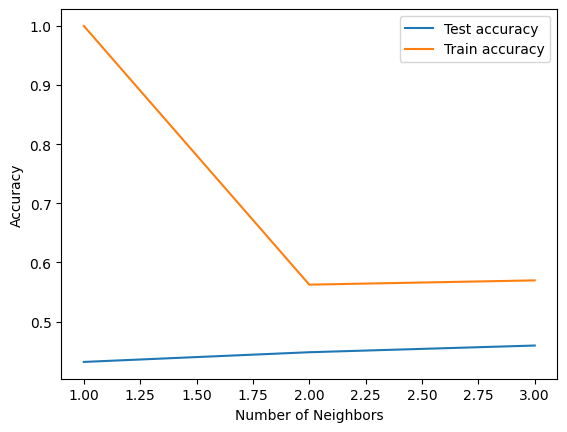

In [19]:
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

# Test Confusion Matrix (Original)

In [20]:
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


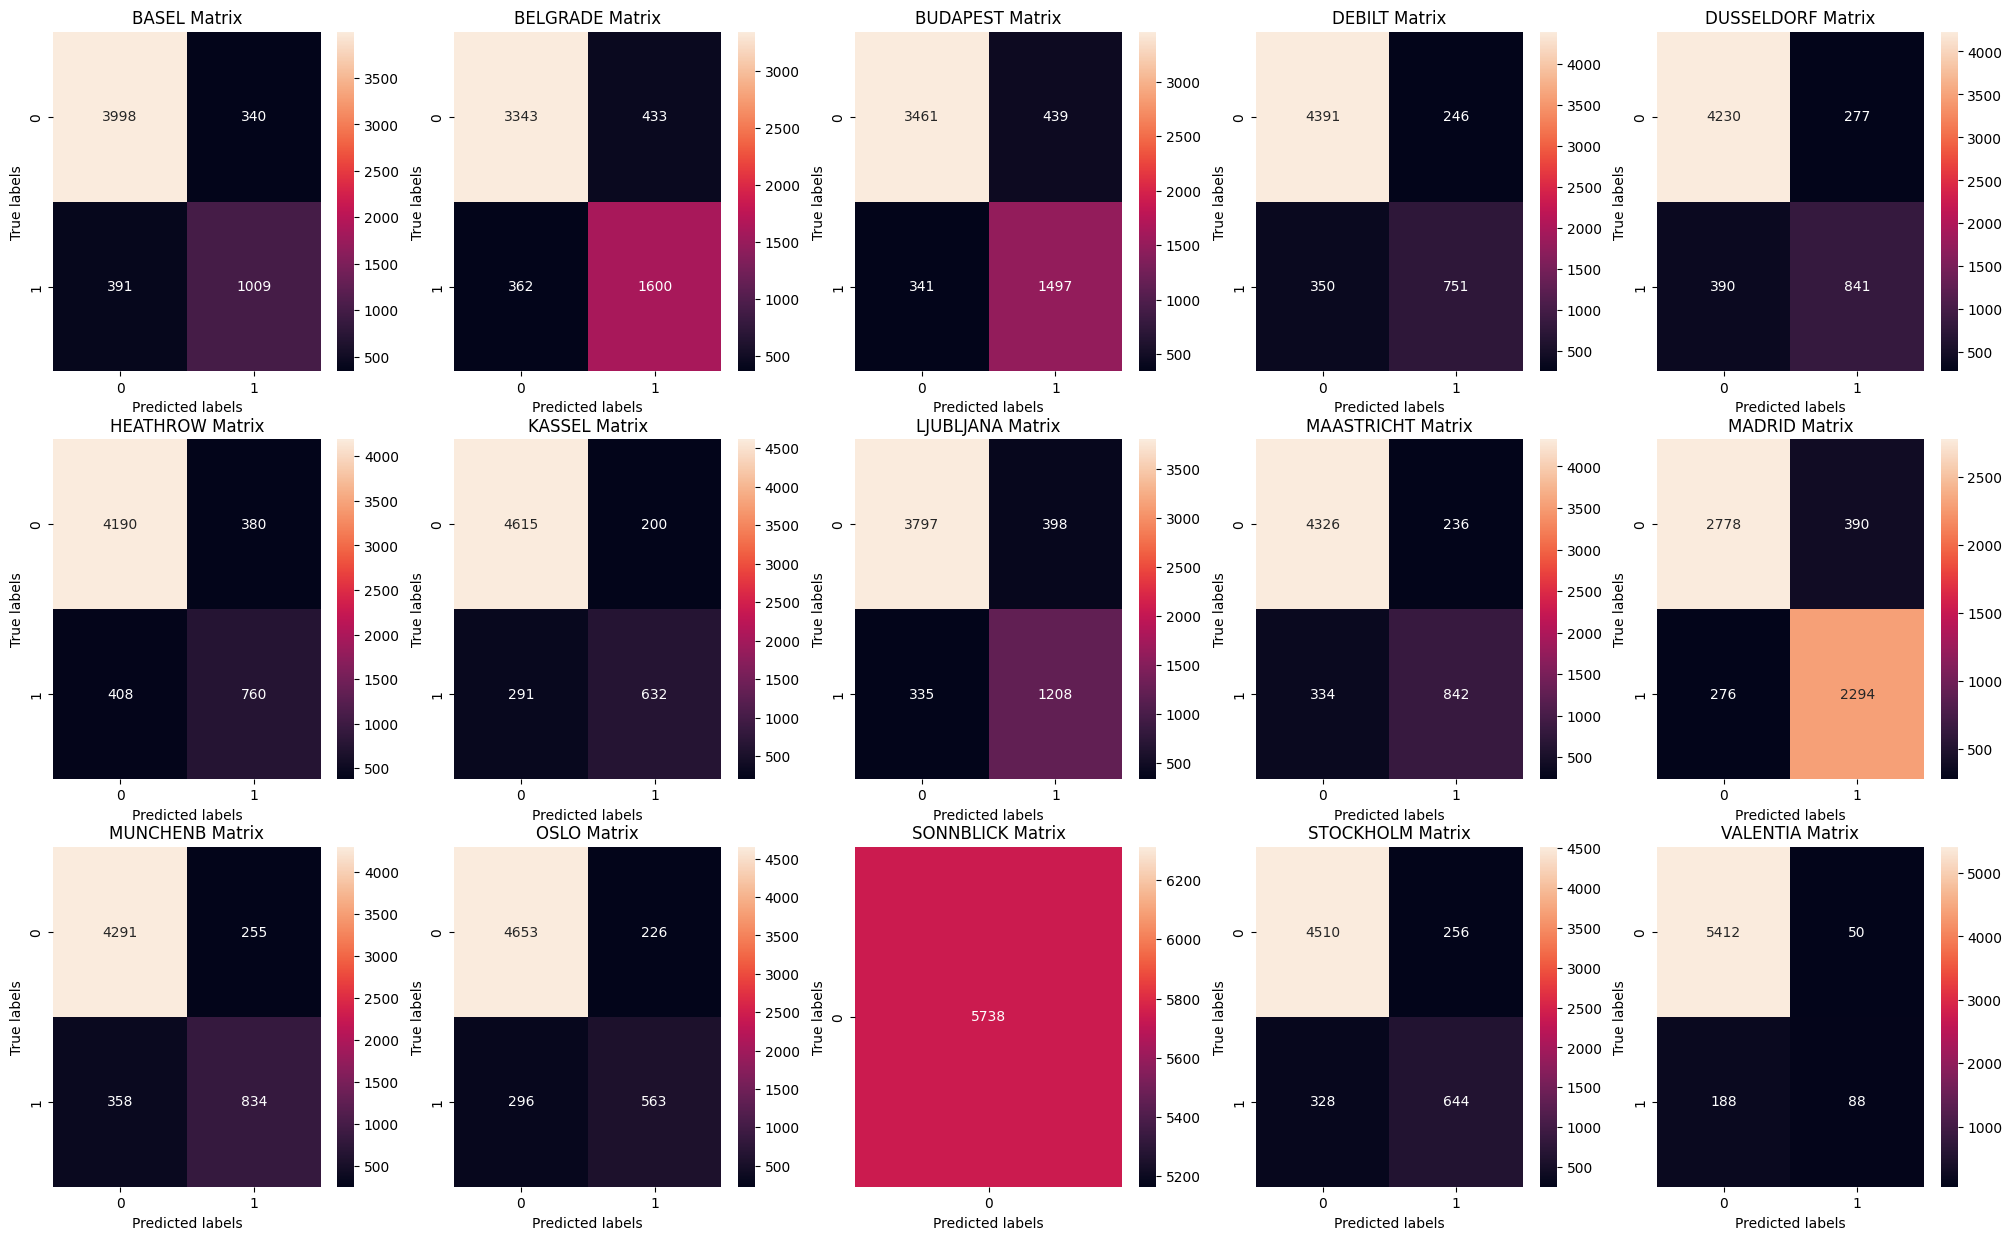

In [21]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Test Confusion Matrix (Scaled)

In [27]:
locations = list({x.split("_")[0] for x in df_filtered2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


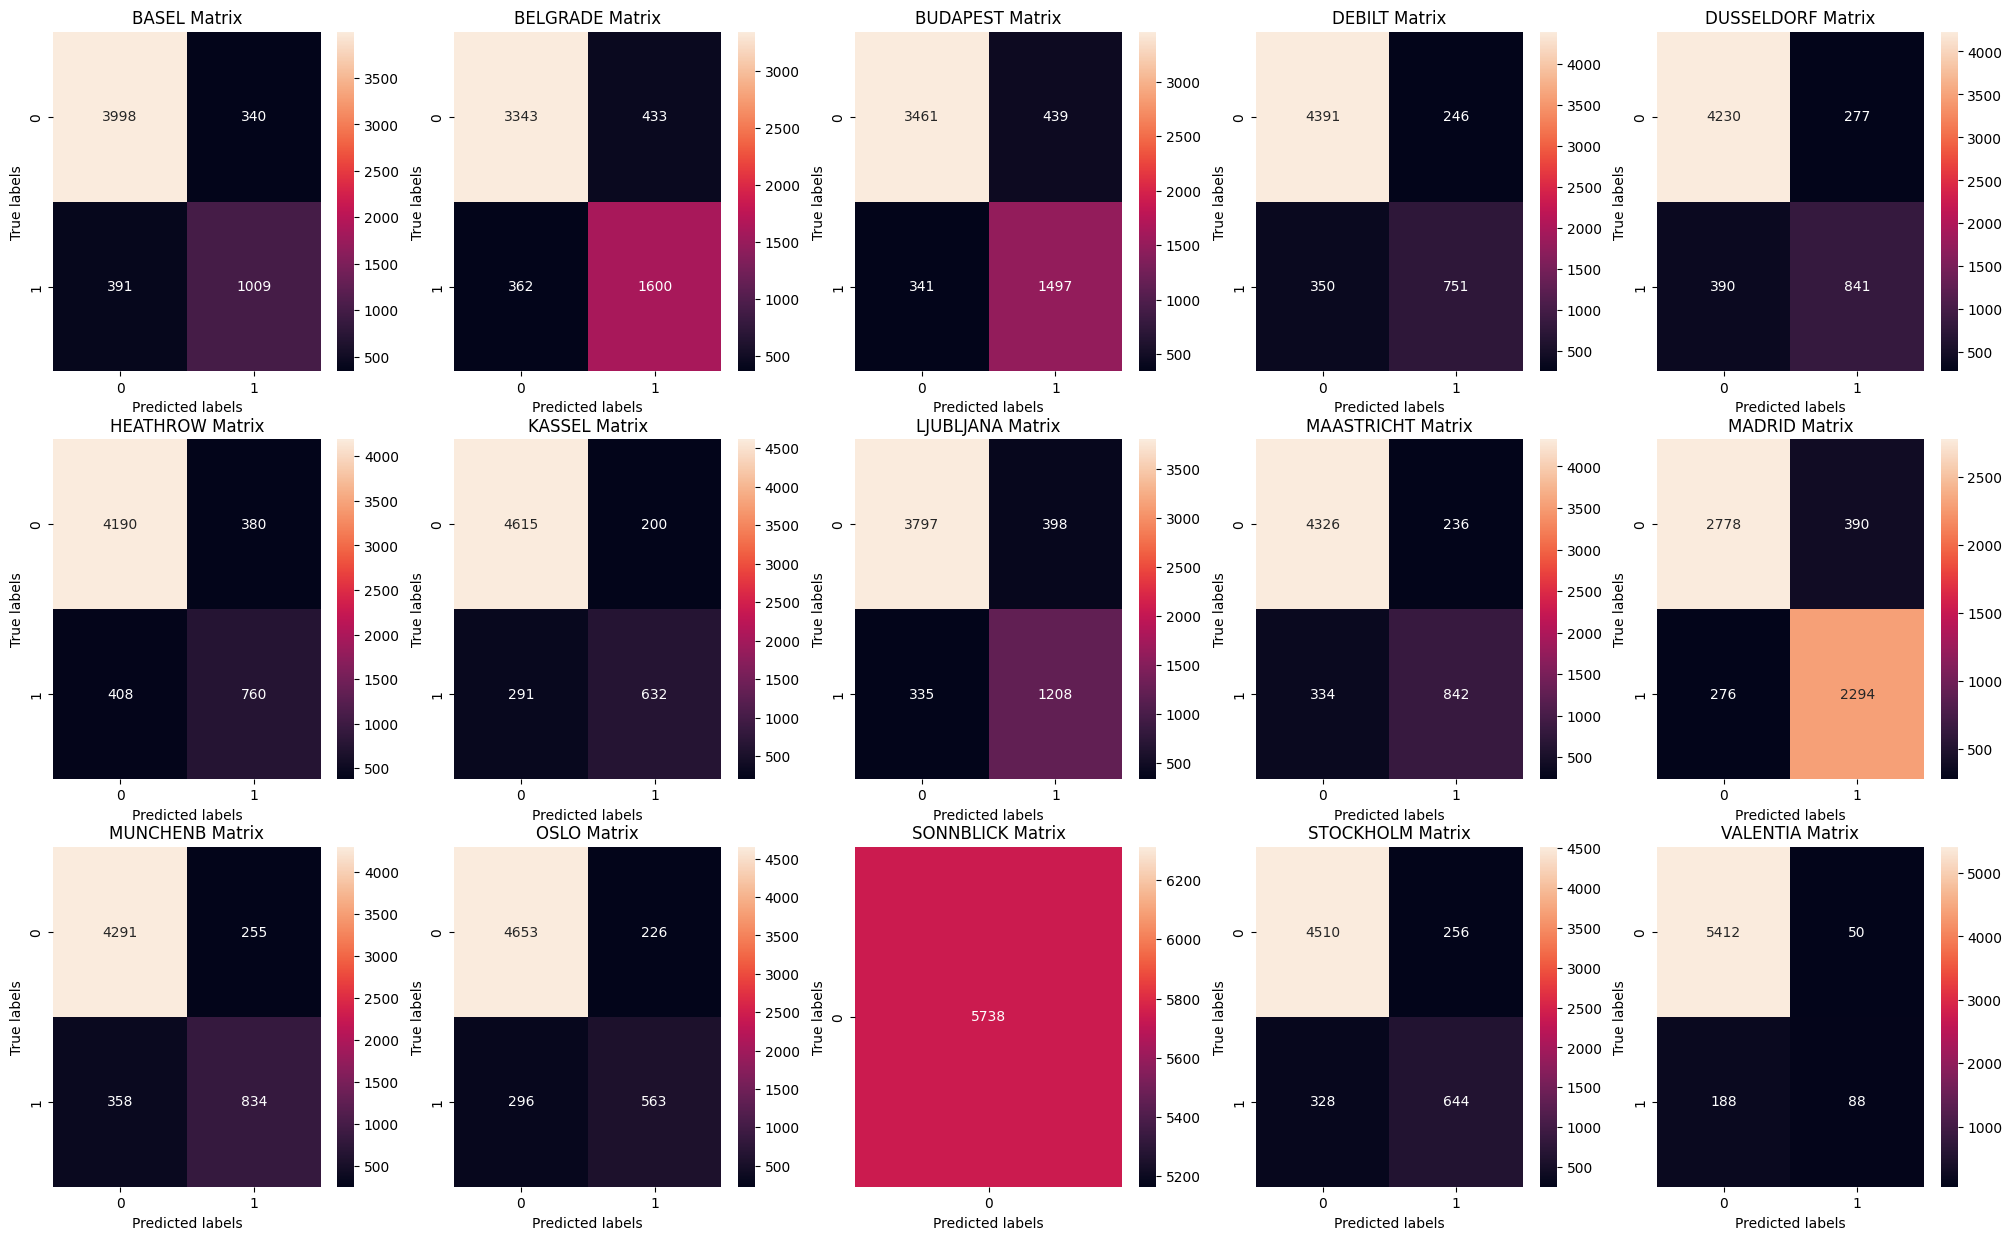

In [28]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## Train Confusion Matrix

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


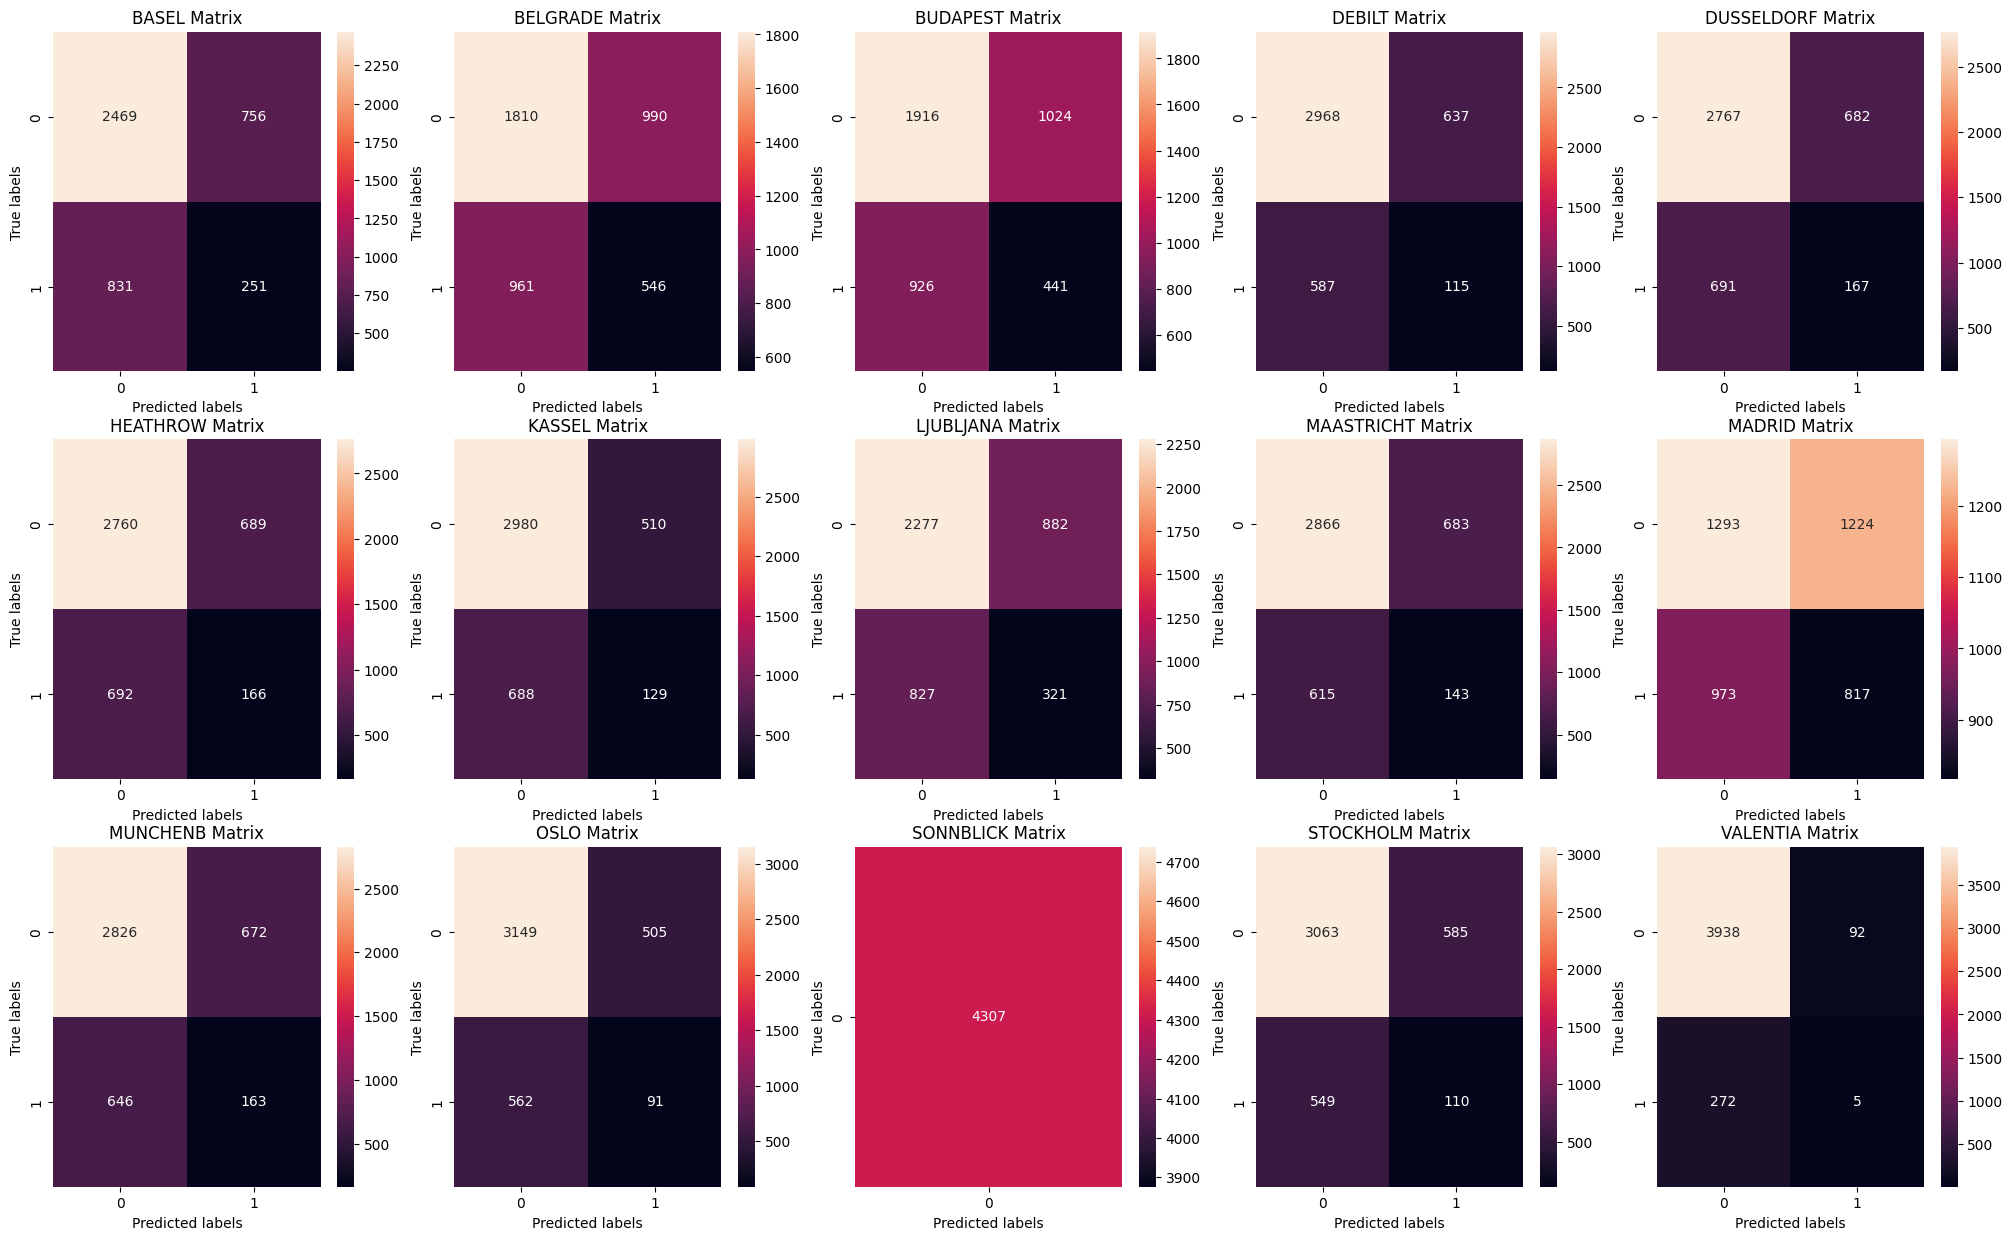

In [29]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        if count < len(locations):  # Check if we haven't exceeded the number of locations
            name = locations[count]
            
            # Make sure we're using the same subset of data for both true and predicted values
            # Get indices where data exists in both sets
            common_indices = y_train.loc[:,name+key].index.intersection(pd.DataFrame(y_pred).index)
            
            # Use only those common indices
            y_true = y_train.loc[common_indices, name+key]
            y_pred_subset = y_pred[common_indices, count]
            
            cm = confusion_matrix(y_true, y_pred_subset)
            
            ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
            # labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels');
            ax[i,j].set_ylabel('True labels'); 
            ax[i,j].set_title(name +' Matrix'); 
            #ax[i,j].xaxis.set_ticklabels(labels); 
            #ax[i,j].yaxis.set_ticklabels(labels);
            count+=1
        else:
            # Hide the subplot if we don't have data for it
            ax[i,j].axis('off')

# Summary

I don't know exactly what is happening with SONNBLICK in the confusion matrix. My first instinct is that because there are no data (only "unpleasant days") that nothing could be plotted. After some Googling it seems that a "perfect score" (if you only have one answer then prediction is guaranteed) is the more complete answer; which makes sense.

I did have to change the code for the training set though. I clearly had help from Anaconda Assistant, but it worked. I'm not entirely certain how the rows became mismatched though.

Also, Google's AI response seemed quite in-depth if a little funky on the code part. I'll paste the answer so you can see for yourself and maybe let me know how far off base it is, haha.

## Google's answer to why Snippet C when set to train didn't work

There are several potential issues with the code, primarily concerning how
y_train and y_pred are being accessed and a common pitfall with setting tick labels. The issue with the commented-out lines is that you might be trying to set tick labels on a heatmap that has been drawn by Seaborn, which can override or conflict with direct Matplotlib calls. 

Potential problems with the code

1. Mismatch between y_train and y_pred access
The code uses y_train.loc[:,name+key] and y_pred[:,count]. This suggests that y_train is a pandas DataFrame and y_pred is a NumPy array. This is likely an error:

    y_train.loc[:,name+key] accesses a specific column of the DataFrame. The y_train data for each station is being selected independently.
    y_pred[:,count] accesses the count-th column of the y_pred NumPy array. This is the predicted data for a specific station, which corresponds to the station's index. 

The potential error here is that the number of rows (samples) in y_train and y_pred must be the same, and the order must be consistent for the confusion matrix to be meaningful.

2. Risk with accessing y_train by column name
If the number of locations (15 in this case) is different from the number of columns in y_train, the code will break. It's better to access y_train by station index, just like y_pred.

3. Overwriting the Axes object
The line ax[i,j] = sns.heatmap(...) is problematic. sns.heatmap() returns the Axes object, but you've already created it with plt.subplots(). This line is unnecessarily reassigning the axes. While it might work, it's not a best practice. The correct approach is to pass the axes to the heatmap function: sns.heatmap(..., ax=ax[i,j]).

4. The set_ticklabels() conflict (The "SONNBLICK" error)
This is the issue you specifically mentioned. The problem is that when you call sns.heatmap(), Seaborn handles the tick labels. If you then call ax.xaxis.set_ticklabels() directly on the Axes object, it can lead to conflicts, as the underlying tick positions may not align with your new labels. 
Why "SONNBLICK" might cause an error:

    A specific location might have data that results in a 1x1 confusion matrix (e.g., if all predictions were correct). If cm is 1x1, you can't set two labels (pleasant, unpleasant).
    The data for a specific station might contain only one class (e.g., all pleasant), also resulting in a 1x1 matrix. 

Proposed corrected code

The following rewritten code addresses the issues by cleaning up the loop, using the Axes object correctly, and setting the tick labels before the heatmap is drawn. A more robust way to handle the labels is to pass them directly to sns.heatmap() using the xticklabels and yticklabels arguments.
python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Assuming 'locations', 'y_train', and 'y_pred' are defined
## Example data (replace with your actual data)
locations = [f'station_{i}' for i in range(15)]
y_train_data = {
    f'{loc}_pleasant_weather': np.random.randint(0, 2, 100) for loc in locations
}
y_train = pd.DataFrame(y_train_data)
y_pred = np.random.randint(0, 2, size=(100, 15))

key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']
fig, ax = plt.subplots(3, 5, figsize=(25, 15))

for count, name in enumerate(locations):
    # Determine the subplot position
    i, j = divmod(count, 5)

    # Correctly access the data by index, not name
    y_true_station = y_train.iloc[:, count]
    y_pred_station = y_pred[:, count]
    
    # Check for single-class data that would result in a 1x1 matrix
    if len(np.unique(y_true_station)) < 2 or len(np.unique(y_pred_station)) < 2:
        print(f"Warning: Skipping {name} due to single-class data.")
        ax[i, j].set_title(f"{name} Matrix (Skipped)", color='red')
        continue

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_station, y_pred_station)

    # Plot the heatmap on the specific subplot, passing labels directly
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], 
                xticklabels=labels, yticklabels=labels)
    
    # Set titles and labels for the specific subplot
    ax[i, j].set_xlabel('Predicted labels')
    ax[i, j].set_ylabel('True labels')
    ax[i, j].set_title(f'{name} Matrix')

plt.tight_layout()
plt.show()

Use code with caution.
Key changes and improvements

    Station data access: Instead of y_train.loc[:,name+key], the code uses y_train.iloc[:, count]. This matches how y_pred is accessed and ensures consistency based on the loop's count.
    Direct label passing: Instead of using set_ticklabels() after the heatmap is drawn, xticklabels and yticklabels are passed directly to sns.heatmap(). This is the recommended and more robust approach.
    Error handling: An explicit check is added for cases where the data contains only one class. This prevents the confusion_matrix from creating a 1x1 matrix, which would cause an indexing error with set_ticklabels() and a misleading plot.
    Axes object: The ax[i,j] = sns.heatmap(...) is corrected to sns.heatmap(..., ax=ax[i,j]) to avoid reassignment and follow best practices.
    plt.tight_layout(): This command is added at the end to automatically adjust subplot parameters for a tighter layout, preventing labels from overlapping.

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1400
           1       0.79      0.82      0.80      1962
           2       0.77      0.81      0.79      1838
           3       0.75      0.68      0.72      1101
           4       0.75      0.68      0.72      1231
           5       0.67      0.65      0.66      1168
           6       0.76      0.68      0.72       923
           7       0.75      0.78      0.77      1543
           8       0.78      0.72      0.75      1176
           9       0.85      0.89      0.87      2570
          10       0.77      0.70      0.73      1192
          11       0.71      0.66      0.68       859
          12       0.00      0.00      0.00         0
          13       0.72      0.66      0.69       972
          14       0.64      0.32      0.43       276

   micro avg       0.77      0.74      0.76     18211
   macro avg       0.70      0.65      0.67     18211
we

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-package